In [2]:
#IMPORTING THE LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
import yfinance as yf


In [3]:
# Define the ticker list
tickers = ['NVDC34.SA', 'BCSA34.SA', 'AMZO34.SA', 'RENT3.SA', 'PRIO3.SA', 'TASA4.SA']

# Fetch the adjusted closing prices
price_data = yf.download(tickers, start='2022-01-01', end='2024-06-01')['Adj Close']

# Display the data
print(price_data)


[*********************100%%**********************]  6 of 6 completed

Ticker      AMZO34.SA  BCSA34.SA  NVDC34.SA   PRIO3.SA   RENT3.SA   TASA4.SA
Date                                                                        
2022-01-03  48.277500  17.401844   3.482568  20.257463  47.880386  20.601072
2022-01-04  47.802574  17.923899   3.424377  20.686773  48.153236  19.744795
2022-01-05  46.950851  17.795675   3.237970  18.460350  46.760765  17.637676
2022-01-06  46.511250  18.317732   3.297147  18.929594  46.939533  17.620886
2022-01-07  45.969601  18.482592   3.165971  19.788216  46.544365  17.855944
...               ...        ...        ...        ...        ...        ...
2024-05-24  46.650002  26.309999  11.425392  43.450001  45.400002  11.400000
2024-05-27  46.910000  26.000000  11.499389  43.669998  44.939999  11.340000
2024-05-28  46.900002  26.129999  12.288346  43.160000  44.560001  11.020000
2024-05-29  47.400002  26.010000  12.439338  42.430000  44.000000  11.080000
2024-05-31  46.299999  27.389999  12.019361  41.610001  42.730000  11.060000

In [4]:
log_ret = np.log(price_data/price_data.shift(1))

In [5]:
cov_mat = log_ret.cov() * 252
print(cov_mat)

Ticker     AMZO34.SA  BCSA34.SA  NVDC34.SA  PRIO3.SA  RENT3.SA  TASA4.SA
Ticker                                                                  
AMZO34.SA   0.175506   0.044378   0.118326 -0.002494 -0.002552  0.005554
BCSA34.SA   0.044378   0.127783   0.050783  0.005626  0.012034  0.004887
NVDC34.SA   0.118326   0.050783   0.313843  0.001060  0.008327  0.019112
PRIO3.SA   -0.002494   0.005626   0.001060  0.165425  0.030798  0.035010
RENT3.SA   -0.002552   0.012034   0.008327  0.030798  0.117931  0.042446
TASA4.SA    0.005554   0.004887   0.019112  0.035010  0.042446  0.130554


In [6]:
# Simulating 5000 portfolios
num_port = 5000
# Creating an empty array to store portfolio weights
all_wts = np.zeros((num_port, len(price_data.columns)))
# Creating an empty array to store portfolio returns
port_returns = np.zeros((num_port))
# Creating an empty array to store portfolio risks
port_risk = np.zeros((num_port))
# Creating an empty array to store portfolio sharpe ratio
sharpe_ratio = np.zeros((num_port))

In [7]:
for i in range(num_port):
  wts = np.random.uniform(size = len(price_data.columns))
  wts = wts/np.sum(wts)
  
  # saving weights in the array
  
  all_wts[i,:] = wts
  
  # Portfolio Returns
  
  port_ret = np.sum(log_ret.mean() * wts)
  port_ret = (port_ret + 1) ** 252 - 1
  
  # Saving Portfolio returns
  
  port_returns[i] = port_ret
  
  
  # Portfolio Risk
  
  port_sd = np.sqrt(np.dot(wts.T, np.dot(cov_mat, wts)))
  
  port_risk[i] = port_sd
  
  # Portfolio Sharpe Ratio
  # Assuming 0% Risk Free Rate
  
  sr = port_ret / port_sd
  sharpe_ratio[i] = sr

In [8]:
names = price_data.columns
min_var = all_wts[port_risk.argmin()]
print(min_var)

[0.17127584 0.23188878 0.00391215 0.14159577 0.24663074 0.20469672]


In [9]:
max_sr = all_wts[sharpe_ratio.argmax()]
print(max_sr)

[0.04863456 0.15916476 0.41513455 0.35745949 0.01734307 0.00226357]


In [10]:
print(sharpe_ratio.max())

1.382909042422407


In [11]:
print(port_risk.min())

0.20624620685244796


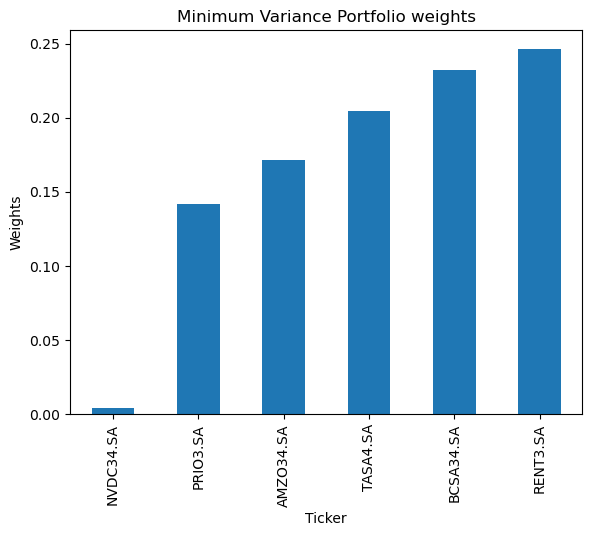

In [12]:
min_var = pd.Series(min_var, index=names)
min_var = min_var.sort_values()
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.set_xlabel('Asset')
ax1.set_ylabel("Weights")
ax1.set_title("Minimum Variance Portfolio weights")
min_var.plot(kind = 'bar')
plt.show();

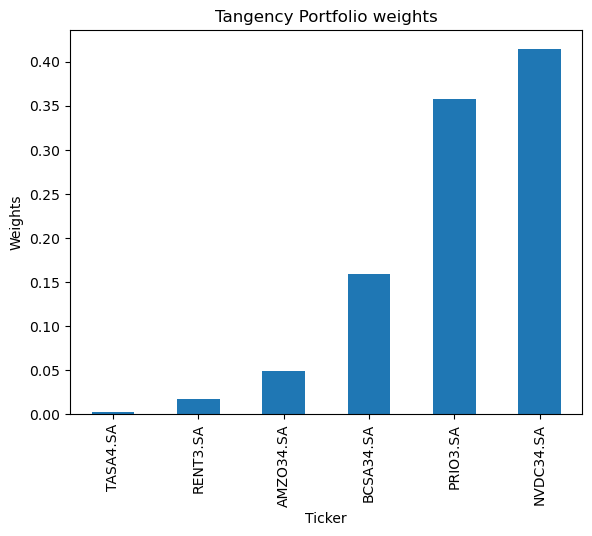

In [13]:
max_sr = pd.Series(max_sr, index=names)
max_sr = max_sr.sort_values()
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.set_xlabel('Asset')
ax1.set_ylabel("Weights")
ax1.set_title("Tangency Portfolio weights")
max_sr.plot(kind = 'bar')
plt.show();

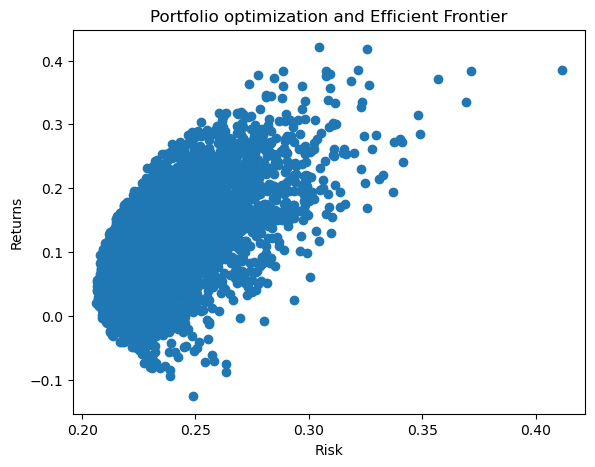

In [14]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.set_xlabel('Risk')
ax1.set_ylabel("Returns")
ax1.set_title("Portfolio optimization and Efficient Frontier")
plt.scatter(port_risk, port_returns)
plt.show();